In [1]:
import os
import glob
import numpy as np 
import xarray as xr
import pandas as pd
import datetime
from datetime import date, timedelta
import dask

# Plotting utils 
import matplotlib
import matplotlib.pyplot as plt 
import cartopy
import cartopy.crs as ccrs


In [2]:
# Grabbed from Brian M. to use time midpoints, not end periods
def cesm_correct_time(ds):
    """Given a Dataset, check for time_bnds,
       and use avg(time_bnds) to replace the time coordinate.
       Purpose is to center the timestamp on the averaging inverval.   
       NOTE: ds should have been loaded using `decode_times=False`
    """
    assert 'time_bnds' in ds
    assert 'time' in ds
    correct_time_values = ds['time_bnds'].mean(dim='nbnd')
    # copy any metadata:
    correct_time_values.attrs = ds['time'].attrs
    ds = ds.assign_coords({"time": correct_time_values})
    ds = xr.decode_cf(ds)  # decode to datetime objects
    return ds

In [5]:
def preprocess_atm(ds): 
    ds = cesm_correct_time(ds)
    return ds

In [3]:
archDir   = '/glade/derecho/scratch/mdfowler/archive/'
icaseName = 'i.e21.I2000Clm50Sp.f09_f09_mg17.S2S_LandAtmCoupling_output.001'
fcaseName = 'f.e21.F2000climo.f09_f09_mg17.S2S_LandAtmCoupling_output.002'



In [10]:
listFiles_fcase_atm = np.sort(glob.glob(archDir+fcaseName+'/atm/hist/*cam.h1.????-*'))
listFiles_fcase_lnd = np.sort(glob.glob(archDir+fcaseName+'/lnd/hist/*clm2.h1.????-*'))

listFiles_icase_lnd = np.sort(glob.glob(archDir+icaseName+'/lnd/hist/*clm2.h1.????-*'))

# Read in files 
f_atm_daily = xr.open_mfdataset(listFiles_fcase_atm, concat_dim='time', 
                                combine='nested', decode_times=True, 
                                data_vars='minimal')
print('atm files loaded')

f_lnd_daily = xr.open_mfdataset(listFiles_fcase_lnd, concat_dim='time', 
                                combine='nested', decode_times=True, 
                                data_vars='minimal')
print('lnd files loaded')

i_lnd_daily = xr.open_mfdataset(listFiles_icase_lnd, concat_dim='time', 
                                combine='nested', decode_times=True, 
                                data_vars='minimal')
print('i-case lnd files loaded')


atm files loaded
lnd files loaded
i-case lnd files loaded


In [17]:
coswgt   = np.cos(np.deg2rad(f_lnd_daily.lat))
f_SoilWat10_mean   = f_lnd_daily.SOILWATER_10CM.weighted(coswgt).mean(('lon','lat'))

i_SoilWat10_mean   = i_lnd_daily.SOILWATER_10CM.weighted(coswgt).mean(('lon','lat'))


Text(0.5, 0, 'Day')

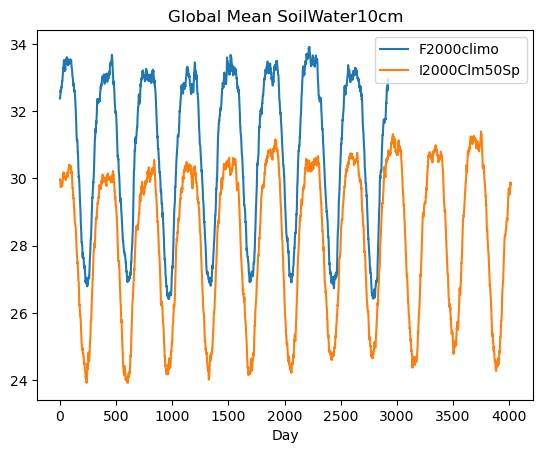

In [20]:
plt.plot(f_SoilWat10_mean.values)
plt.plot(i_SoilWat10_mean.values)
plt.legend(['F2000climo','I2000Clm50Sp'])
plt.title('Global Mean SoilWater10cm')
plt.xlabel('Day')

In [21]:
coswgt   = np.cos(np.deg2rad(f_lnd_daily.lat))
f_TSKIN_mean   = f_lnd_daily.TSKIN.weighted(coswgt).mean(('lon','lat'))

i_TSKIN_mean   = i_lnd_daily.TSKIN.weighted(coswgt).mean(('lon','lat'))


Text(0.5, 0, 'Day')

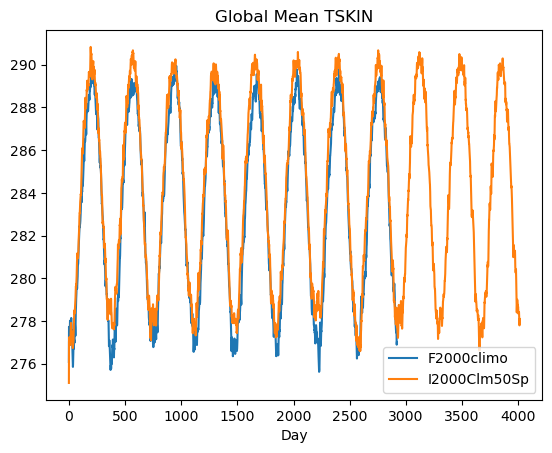

In [22]:
plt.plot(f_TSKIN_mean.values)
plt.plot(i_TSKIN_mean.values)
plt.legend(['F2000climo','I2000Clm50Sp'])
plt.title('Global Mean TSKIN')
plt.xlabel('Day')